In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:

BW_image = Image.open('stalin.tif')

In [5]:
BW_image_arr = np.asarray(BW_image)


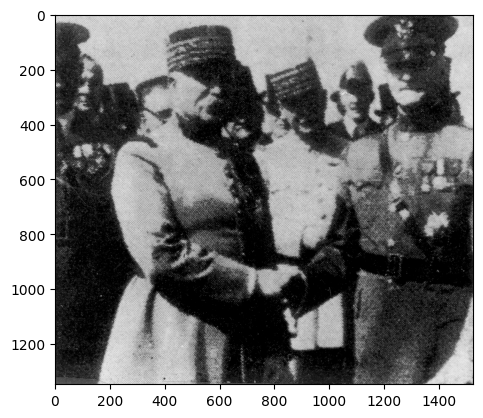

In [6]:
plt.imshow(BW_image,cmap='grey')

#Task 1

Write a function that takes a grayscale image as argument and generates the histogram of that grayscale image. You can use any suitable grayscale image from here: https://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

In [12]:
def my_histogram(gray_image , channelname='Histogram'):
  data = gray_image.flatten()

  
  print(len(data))
  plt.hist(data,bins=255)
  plt.title(channelname)
  plt.show()



2054175


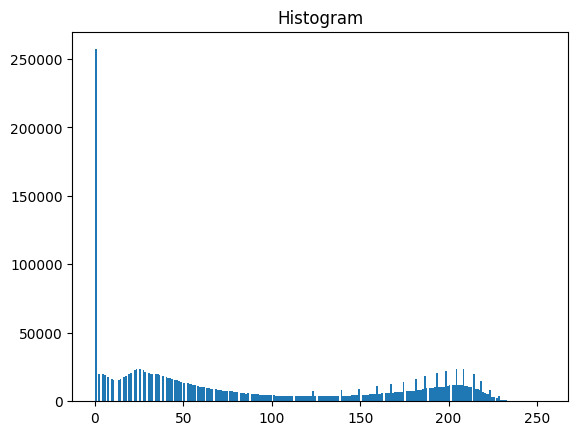

In [13]:
my_histogram(BW_image_arr)

### Histogram(Discussion)
Here the histogram function has been implemented, it takes an image array and flattens it and pyplot forms the histogram. This partigular histogram looks a bit odd because of the image "stalin.tif" being very old. It has a lot of pixels having 0 brightness

# Task 2
Take any suitable color image and divide it into 3 separate channels. Display the individual channels in their own color. For example, the red channel should generate a red image, where the intensity of red in each pixel will depend on how much red is present in that pixel in the original color image

In [8]:
Color_img = Image.open('color.jpg')

In [60]:
def channel_show(color_image):
  #implement this function
  img_array = np.asarray(color_image).astype(np.uint8)

  show_imgR = np.zeros(img_array.shape).astype(dtype=np.uint8)
  show_imgG = np.zeros(img_array.shape).astype(dtype=np.uint8)
  show_imgB = np.zeros(img_array.shape).astype(dtype=np.uint8)
  
  show_imgR[:,:,0] = img_array[:,:,0]
  show_imgG[:,:,1] = img_array[:,:,1]
  show_imgB[:,:,2] = img_array[:,:,2]

  fig,ax = plt.subplots(1,4)
  fig.set_figwidth(15)
  fig.set_figheight(15)

  ax[0].imshow(img_array)
  ax[0].set_title('Original')
  
  ax[1].imshow(show_imgR)
  ax[1].set_title('Red')
  ax[2].imshow(show_imgG)
  ax[2].set_title('Green')
  ax[3].imshow(show_imgB)
  ax[3].set_title('Blue')


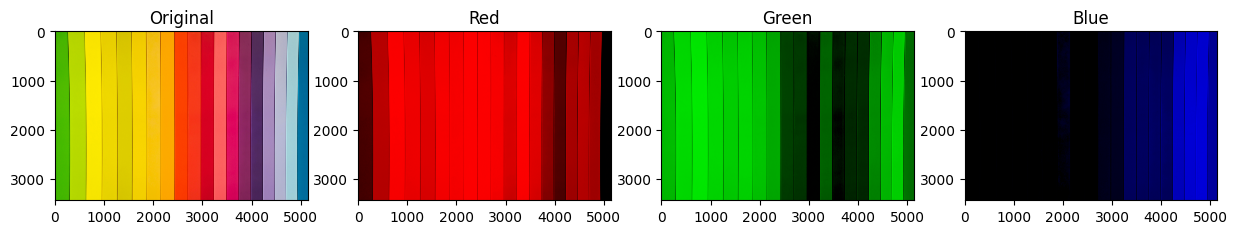

In [61]:
channel_show(Color_img)

### Channel splitting(Discussion)
Here the original image having various shades have been split into 3 channels, Red, Green, and Blue. Abscence of the color makes it black and if that color is present , then it is shown in the channel. It is observed that the blue color is the least present.This will be verified by the histogram.

# Task 3

Use your previously written histogram function from Task 1 to generate the histogram of color image. Since color images have 3 channels, so you will have 3 histograms. Analyze the histograms to determine which color is more dominant in the image.


17654194


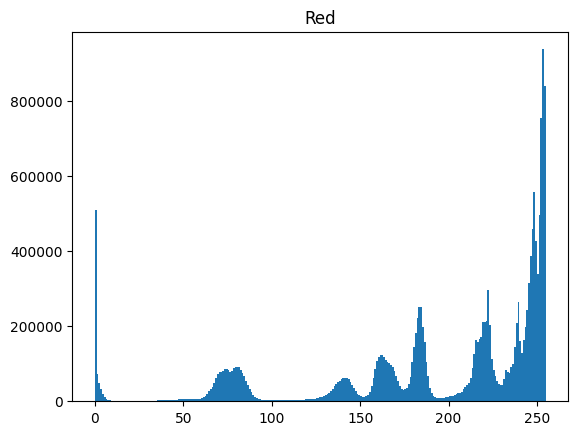

17654194


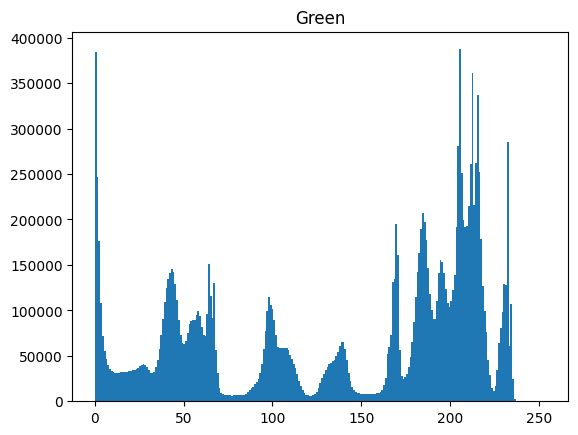

17654194


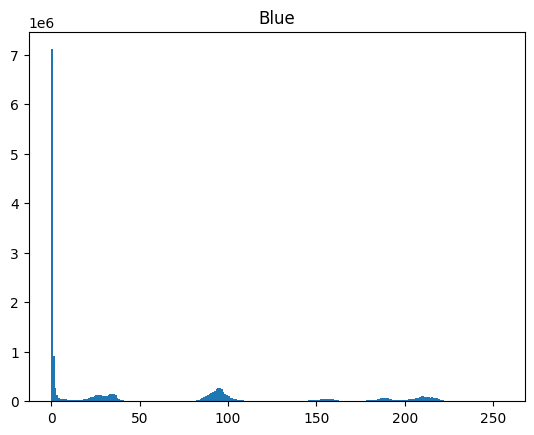

In [14]:
#write your implementation here
color_imgarr = np.asarray(Color_img)

my_histogram(color_imgarr[:,:,0],'Red')
my_histogram(color_imgarr[:,:,1],'Green')
my_histogram(color_imgarr[:,:,2],'Blue')

### Histogram of RGB channels(Discussion)
Here the same image from task 2 has been split into 3 channels and their histograms are shown. As seen previously, blue channel had the highest amount of dark pixels. The histogram of the blue channel confirms it.

# Task 4

Write a function that takes 3 parameters: a color image, a channel_number (0 for red, 1 for green and 2 for blue) and an enhancement value between 0 and 1, and returns an enhanced version of the image. Show the enhanced image. As an example, refer to the following image which shows the result for red enhancement.
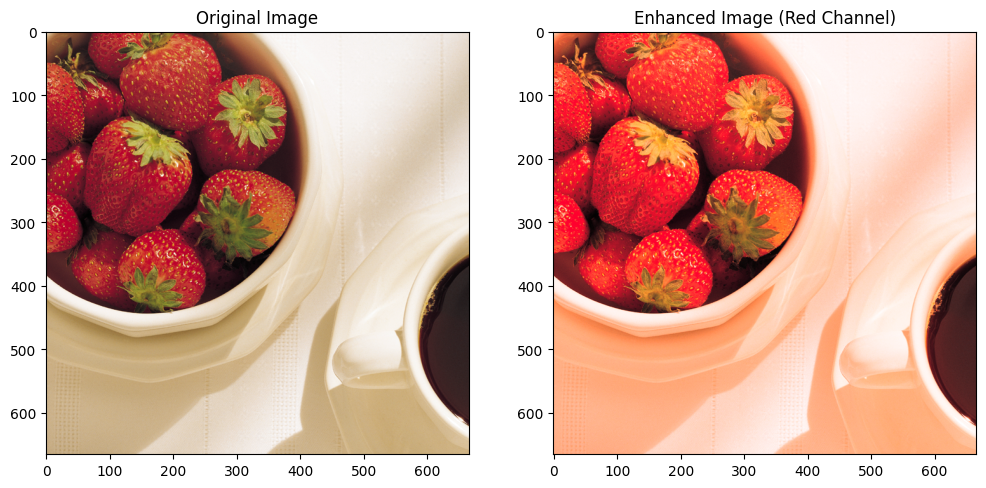

In [48]:
def enhancer(v, factor):
    return (1.0+factor)*v

def scaler(v, val):
    return min(v,255)

v_enh = np.vectorize(enhancer)
v_scaler = np.vectorize(scaler)

In [49]:
def color_enhance_v(color_image, channel_number, enhancement_val):

  imgarr= np.asarray(color_image).copy().astype(dtype=np.float32)
  val = 0.0

  imgarr[:,:,channel_number] = v_enh(imgarr[:,:,channel_number],enhancement_val)
  
  val = np.max(imgarr[:,:,channel_number])
  print(val)
  imgarr[:,:,channel_number] = v_scaler(imgarr[:,:,channel_number],val)
  


  fig, ax = plt.subplots(1,2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  ax[0].imshow(color_image)
  ax[1].imshow(imgarr.astype(dtype=np.uint8))


433.5


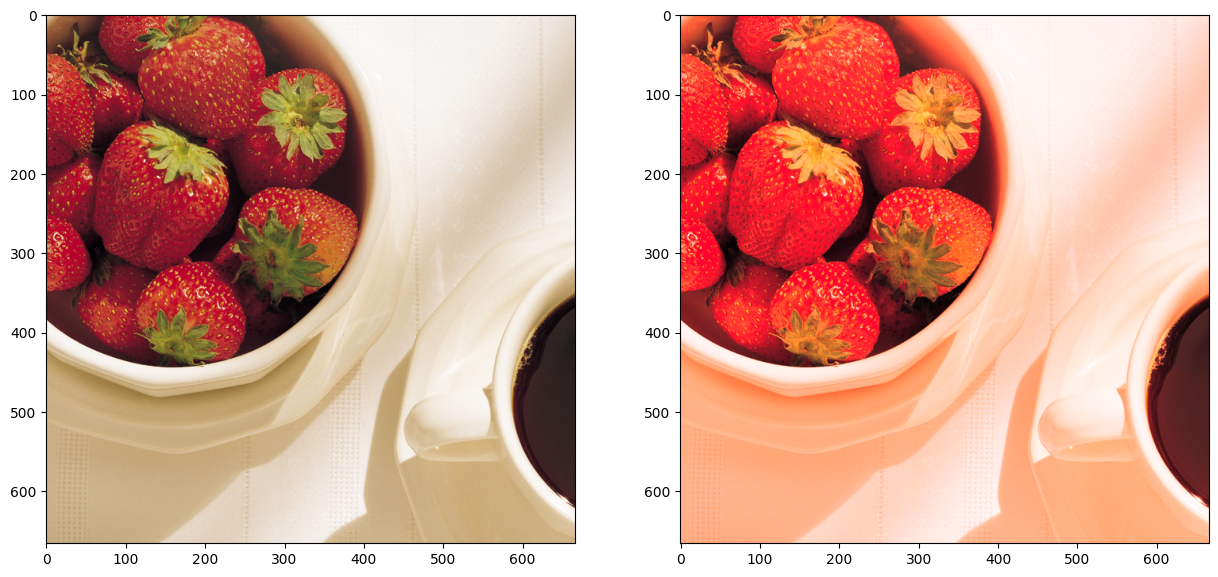

In [53]:
strawberry = Image.open('strawberry.tif')
color_enhance_v(strawberry,0,.7)

### Image Enhancement(Discussion)
The image enhancement functions enhances a specific channel color. This is done by two functions, the `enhancer` and the `scaler`. The `enhancer` takes a pixel of the correspoinding channel and increases its brightness by the following formula $f(x,y,c)=f(x,y,c)+f(x,y,c)*enhancement$. The `scaler` clips the values within 255.The image in the left of the above figure has enhanced red channel.

# Task 5

Write a function that takes a grayscale image as argument and returns the negative of that image. For an 8-bit image, it follows:

$$g(x,y) = L_{max} - f(x,y);$$
where $L_{max}=255$

In [54]:
def invert(v):
    return 255-v

v_inv = np.vectorize(invert)

In [62]:
def invert_gray(gray_image):
  #implement this function

  imgarr = np.asarray(gray_image).copy()

  imgarrbw = v_inv(imgarr)

  fig,ax = plt.subplots(1,2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  ax[0].imshow(imgarr,cmap='grey')
  ax[1].imshow(imgarrbw,cmap='grey')
  



# Task 6

Extend your function so that it works for color images too.

In [63]:
def invert_color(color_image):
  #implement this function
  imgarr = np.asarray(color_image).copy()

  imgarrcol = v_inv(imgarr)

  fig,ax = plt.subplots(1,2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  ax[0].imshow(imgarr,cmap='grey')
  ax[1].imshow(imgarrcol,cmap='grey')

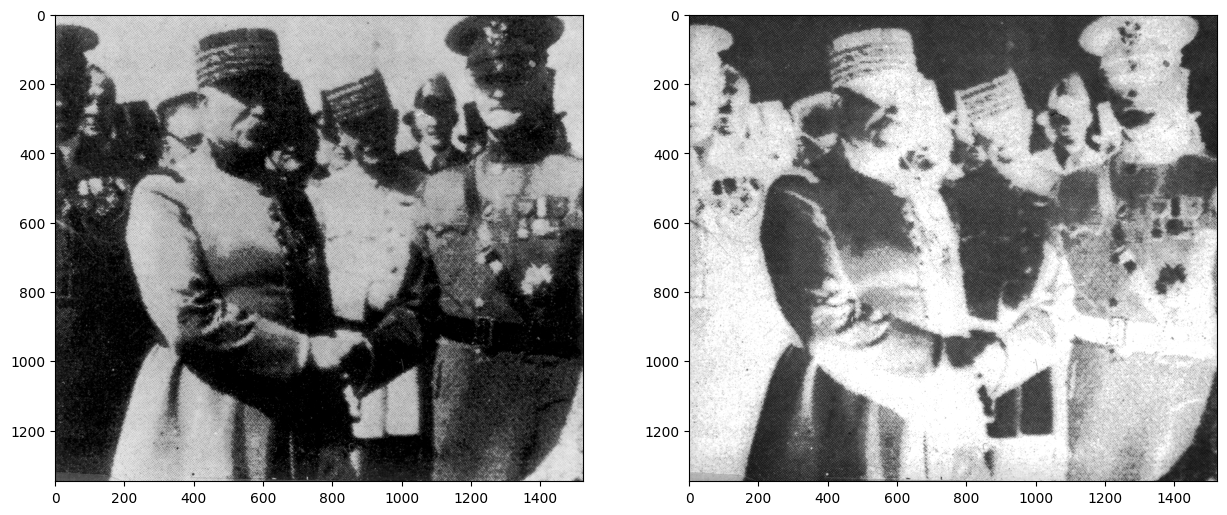

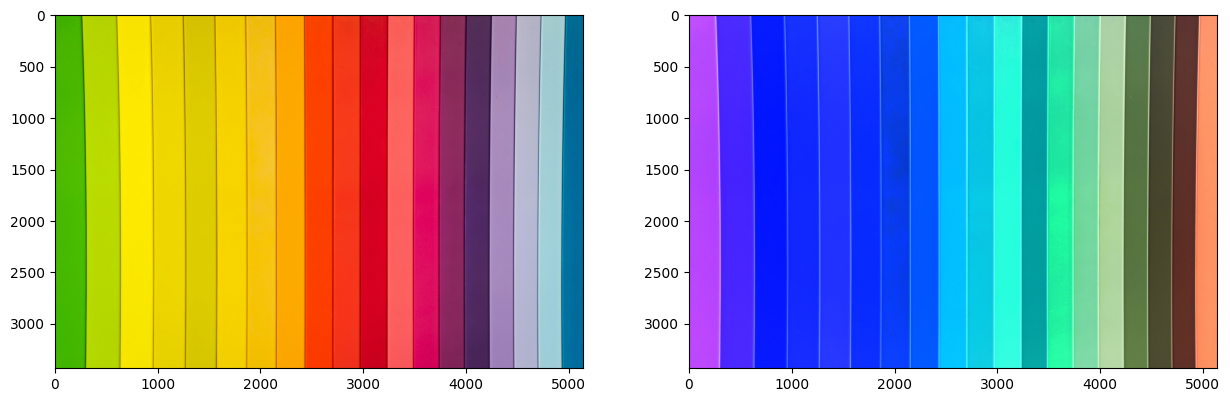

In [64]:
invert_gray(BW_image)
invert_color(Color_img)

### Color Inversion(Discussion)
Here, an inversion function has been applied to the underlying np arrays of the image which basically complements the pixels with 255. For the grayscale image, the white part becomes dark and vice versa. For the color image, the inverted color is the opposite color found for a color in the color wheel, such as green is inverted to magenta/purple.